In [55]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import missingno as ms
from scipy import stats 

In [56]:
data = pd.read_csv('/Users/iseonmi/Desktop/1-1/ME 특론/heart.csv')

In [57]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data description
* age
* sex
* chest pain type 
    * Value 0: asymptomatic
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: typical angina
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results 
    * Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
    * Value 1: normal
    * Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment: 0= downsloping; 1= flat; 2= upsloping
* number of major vessels (0-3) colored by flourosopy
* thal: blood stream was... 2 = normal; 1 = fixed defect; 3 = reversable defect

## Purpose
See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.



In [58]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [59]:
F = (10,6)
subF = (16,6)
C = (0.2,0.7,0.3)
Fsize = 17

In [60]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Preprocessing

In [69]:
#target 0 1 change
data.target.replace(1,3,inplace = True)
data.target.replace(0,1,inplace = True)
data.target.replace(3,0, inplace = True)
data.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [88]:
# out data form
k = data[data.ca == 4].index
data.drop(index = k, axis = 0, inplace = True)
k = data[data.thal == 0].index
data.drop(index = k, axis = 0, inplace = True)


In [116]:
data.thal.unique()

array([1, 2, 3])

## Each variable --> target/nontarget

Text(0.5, 1.0, 'Disease')

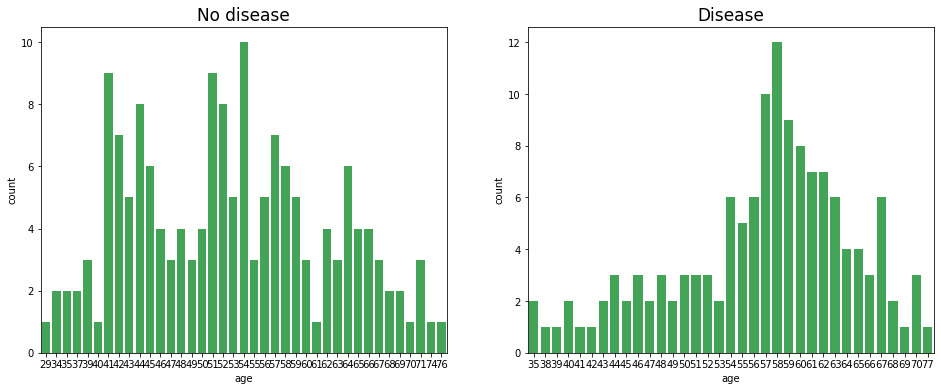

In [89]:
f, ax = plt.subplots(1,2, figsize = subF)
sns.countplot(data = data[data['target']==0], x = 'age', color = C, ax = ax[0])
ax[0].set_title('No disease',fontsize = Fsize)
sns.countplot(data = data[data['target']==1], x = 'age', color = C, ax = ax[1])
ax[1].set_title('Disease', fontsize = Fsize)


In [90]:
print('0 average age: {:.1f}'.format(np.average(data[data['target']==0].age)))
print('1 average age: {:.1f}'.format(np.average(data[data['target']==1].age)))
print('0 median age: {}'.format(np.median(data[data['target']==0].age)))
print('1 median age: {}'.format(np.median(data[data['target']==1].age)))
print('0 min age: {}'.format(min(data[data['target']==0].age)))
print('1 min age: {}'.format(min(data[data['target']==1].age)))
print('0 max age: {}'.format(max(data[data['target']==0].age)))
print('1 max age: {}'.format(max(data[data['target']==1].age)))

0 average age: 52.6
1 average age: 56.7
0 median age: 52.0
1 median age: 58.0
0 min age: 29
1 min age: 35
0 max age: 76
1 max age: 77


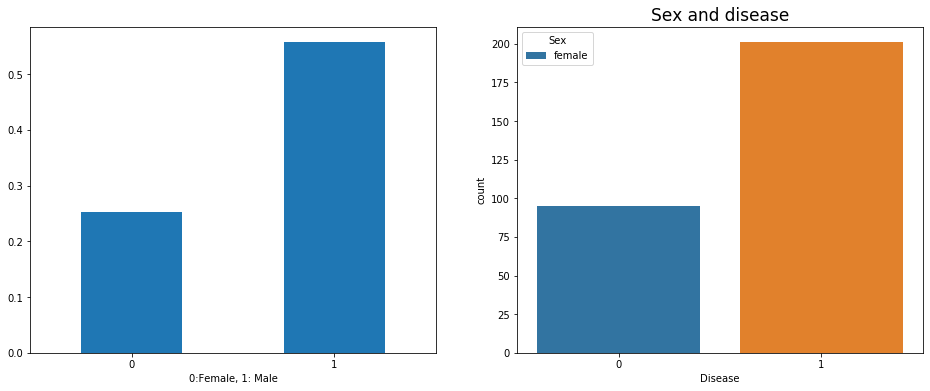

발병률-F:M = 0.25:0.56


In [131]:
f, ax = plt.subplots(1,2, figsize = subF)
data['target'].groupby(data['sex']).mean().plot.bar(rot = 0, ax = ax[0])
ax[0].set_xlabel('0:Female, 1: Male')
sns.countplot(x = 'sex', data = data, ax = ax[1])
ax[1].set_xlabel('Disease')
plt.title('Sex distribution', fontsize  = Fsize)
plt.legend(title = 'Sex', labels = ['female','male'])

plt.show()
x = data['target'].groupby(data['sex']).mean()
print('발병률-F:M = {:.2f}:{:.2f}'.format(x[0],x[1]))

### CP와 disease 상관관계 이상함
[angina](https://www.heart.org/en/health-topics/heart-attack/angina-chest-pain)
* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina
  
--> Excution:For your first question, I've seen that graph and I don't think that it is very surprising once you take into account that these chest pain types are very subjective. I think that this graph tell us that knowing whether a patient has a heart disease or not (or almost any disease) based only on what they feel is very very difficult, thus the need of doing medical tests.

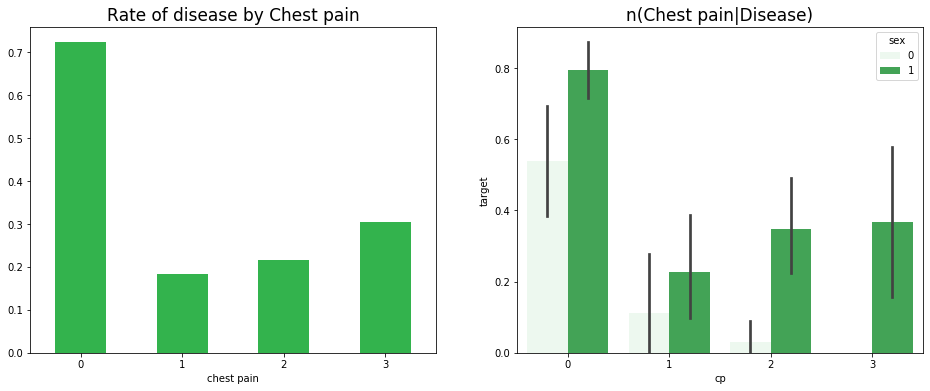

In [119]:
f, ax = plt.subplots(1,2, figsize = subF)
ax[0].set_title('Rate of disease by Chest pain', fontsize = Fsize)
data['target'].groupby(data['cp']).mean().plot.bar(rot = 0,ax = ax[0], color = C)
ax[0].set_xlabel('chest pain')

sns.barplot(data= data, x = 'cp', y = 'target',hue = 'sex' ,ax= ax[1],color = C)
ax[1].set_title('n(Chest pain|Disease)', fontsize = Fsize)
plt.show()

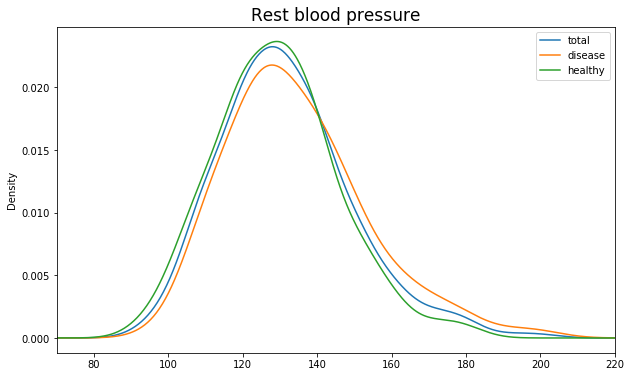

In [93]:
plt.figure(figsize = F)
data.trestbps.plot(kind = 'kde')
data[data['target']==1].trestbps.plot(kind = 'kde')
data[data['target']==0].trestbps.plot(kind = 'kde')
plt.title('Rest blood pressure',fontsize = Fsize)
plt.legend(['total','disease','healthy'])
plt.xlim([70,220])
plt.show()
print('min {}'.format(min(data.trestbps)))
print('max {}'.format(max(data.trestbps)))

In [130]:
a = stats.ttest_ind(data[data['target']==1].trestbps, data[data['target']==0].trestbps)
print('Rest blood pressure is significantly different between disease& non disease/ P-value:{:.2f}'.format(a.pvalue))

Rest blood pressure is significantly different between disease& non disease/ P-value:0.01


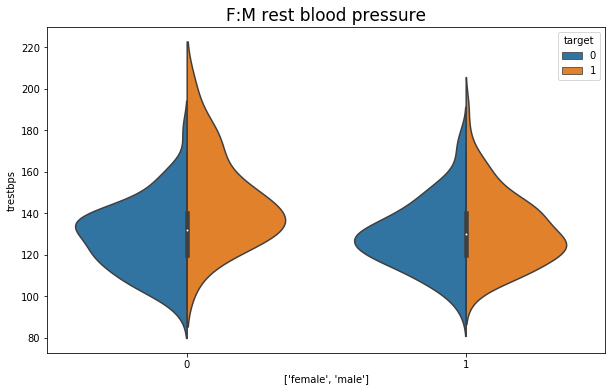

고혈압& 남성이 많이 걸리는거같음


In [137]:
plt.figure(figsize = F)
sns.violinplot(data = data, x = 'sex', y = 'trestbps', hue = 'target',split = True)
plt.title('F:M rest blood pressure', fontsize = Fsize)
plt.xlabel(['female','male'])
plt.show()

print('고혈압& 남성이 많이 걸리는거같음')

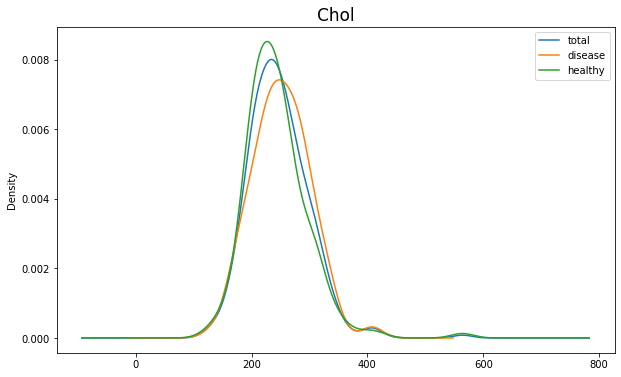

average/std col of disease: 251.5/49.5
average/std col of non disease: 243.5/53.6
result of t-test = 0.19


In [139]:
plt.figure(figsize = F)
data.chol.plot(kind = 'kde')
data[data['target']==1].chol.plot(kind = 'kde')
data[data['target']==0].chol.plot(kind = 'kde')
plt.title('Chol',fontsize = Fsize)
plt.legend(['total','disease','healthy'])
#plt.xlim([70,220])
plt.show()
print('average/std col of disease: {:.1f}/{:.1f}'.format(np.average(data[data['target']==1].chol),np.std(data[data['target']==1].chol)))
print('average/std col of non disease: {:.1f}/{:.1f}'.format(np.average(data[data['target']==0].chol),np.std(data[data['target']==0].chol)))
a = stats.ttest_ind(data[data['target']==1].chol,data[data['target']==0].chol)
print('result of t-test = {:.2f}'.format(a.pvalue))

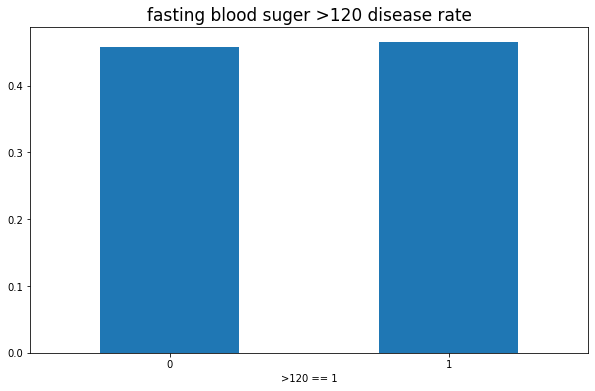

In [99]:
plt.figure(figsize = F)
data.target.groupby(data.fbs).mean().plot.bar(rot = 0)
plt.title('fasting blood suger >120 disease rate', fontsize = Fsize)
plt.xlabel('>120 == 1')
plt.show()

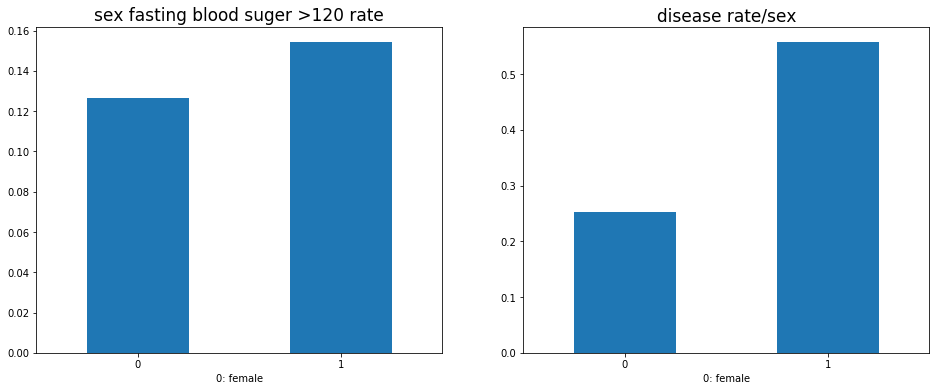

blood suger >120 일수록 병에 걸리는것 같음


In [142]:
f, ax = plt.subplots(1,2, figsize = subF)
data.fbs.groupby(data.sex).mean().plot.bar(rot = 0, ax= ax[0])
ax[0].set_title('sex fasting blood suger >120 rate', fontsize = Fsize)
ax[0].set_xlabel('0: female')
data.target.groupby(data.sex).mean().plot.bar(rot = 0, ax= ax[1])
ax[1].set_title('disease rate/sex', fontsize = Fsize)
ax[1].set_xlabel('0: female')
plt.show()
print('blood suger >120 일수록 병에 걸리는것 같음')

### Resting electrocardiographic result 는 categorical 같은데...?
normal = 1 이고 둘다 비정상 아니야?

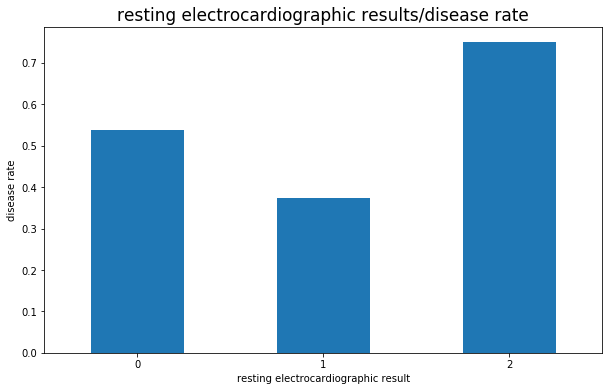

In [101]:
# resting electrocardiographic results (values 0,1,2)
plt.figure(figsize = F)
data.target.groupby(data.restecg).mean().plot.bar(rot = 0)
plt.title('resting electrocardiographic results/disease rate',fontsize = Fsize)
plt.ylabel('disease rate')
plt.xlabel('resting electrocardiographic result')
plt.show()

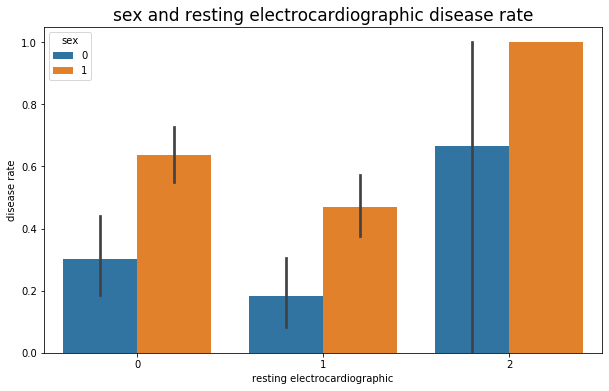

In [102]:
plt.figure(figsize = F)
sns.barplot(data= data, x = 'restecg', y = 'target',hue = 'sex')
plt.xlabel('resting electrocardiographic')
plt.ylabel('disease rate')
plt.title('sex and resting electrocardiographic disease rate',fontsize = Fsize)
plt.show()

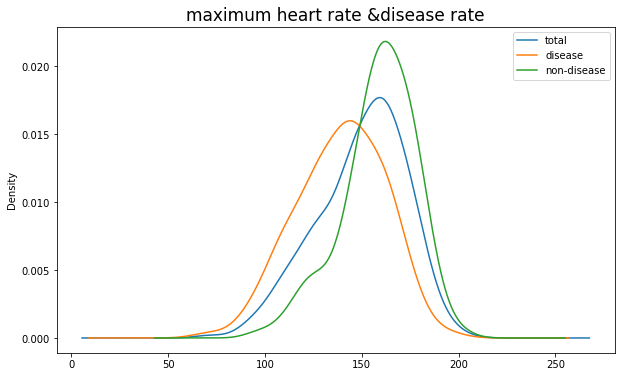

maximum heart rate difference disease vs non disease: 0.000


In [103]:
#maximum heart rate achieved
plt.figure(figsize = F)
data.thalach.plot(kind = 'kde')
data[data["target"]==1].thalach.plot(kind ='kde')
data[data["target"]==0].thalach.plot(kind ='kde')
plt.legend(['total','disease','non-disease'])
plt.title('maximum heart rate &disease rate', fontsize = Fsize)
plt.show()
a = stats.ttest_ind(data[data['target']==0].thalach,data[data['target']==1].thalach)
print('maximum heart rate difference disease vs non disease: {:.3f}'.format(a.pvalue))

### maximum heart rate achieved(thalach) is very significant 

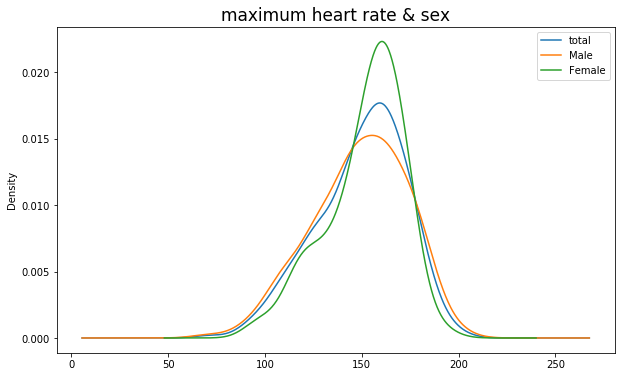

maximum heart rate difference disease vs non disease: 0.318


In [104]:
plt.figure(figsize = F)
data.thalach.plot(kind = 'kde')
data[data["sex"]==1].thalach.plot(kind ='kde')
data[data["sex"]==0].thalach.plot(kind ='kde')
plt.legend(['total','Male','Female'])
plt.title('maximum heart rate & sex', fontsize = Fsize)
plt.show()
a = stats.ttest_ind(data[data['sex']==0].thalach,data[data['sex']==1].thalach)
print('maximum heart rate difference disease vs non disease: {:.3f}'.format(a.pvalue))

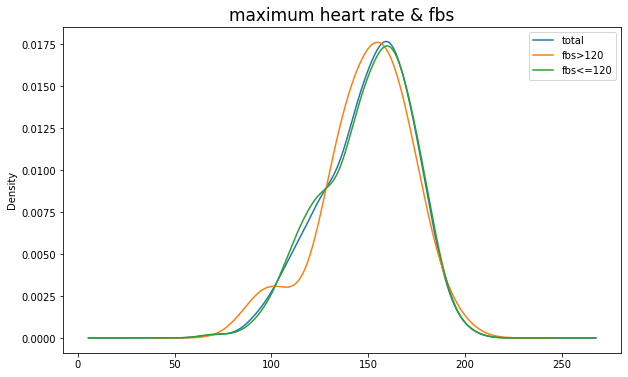

maximum heart rate difference disease vs non disease: 0.902


In [105]:
plt.figure(figsize = F)
data.thalach.plot(kind = 'kde')
data[data["fbs"]==1].thalach.plot(kind ='kde')
data[data["fbs"]==0].thalach.plot(kind ='kde')
plt.legend(['total','fbs>120','fbs<=120'])
plt.title('maximum heart rate & fbs', fontsize = Fsize)
plt.show()
a = stats.ttest_ind(data[data['fbs']==0].thalach,data[data['fbs']==1].thalach)
print('maximum heart rate difference disease vs non disease: {:.3f}'.format(a.pvalue))

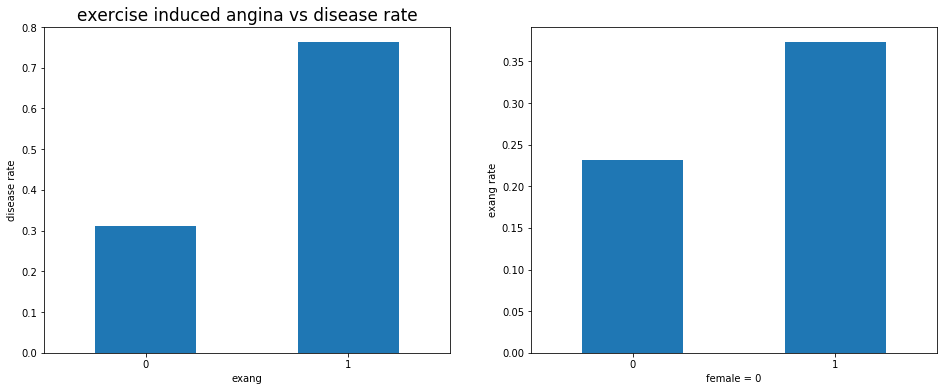

exercise induced angina helps to prevent disease??


In [106]:
#exercise induced angina(운동유발협심증)
f, ax = plt.subplots(1,2, figsize = subF)
data.target.groupby(data.exang).mean().plot.bar(rot = 0, ax = ax[0])
ax[0].set_title('exercise induced angina vs disease rate',fontsize = Fsize)
ax[0].set_ylabel('disease rate')
data.exang.groupby(data.sex).mean().plot.bar(rot = 0, ax = ax[1])
ax[1].set_xlabel('female = 0')
ax[1].set_ylabel('exang rate')
plt.show()
print('exercise induced angina helps to prevent disease??')

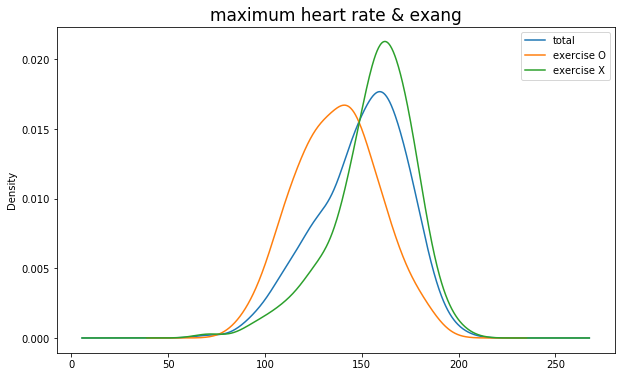

maximum heart rate difference disease vs non disease: 0.000


In [107]:
plt.figure(figsize = F)
data.thalach.plot(kind = 'kde')
data[data["exang"]==1].thalach.plot(kind ='kde')
data[data["exang"]==0].thalach.plot(kind ='kde')
plt.legend(['total','exercise O','exercise X'])
plt.title('maximum heart rate & exang', fontsize = Fsize)
plt.show()
a = stats.ttest_ind(data[data['exang']==0].thalach,data[data['exang']==1].thalach)
print('maximum heart rate difference disease vs non disease: {:.3f}'.format(a.pvalue))

### Exang(exercise) and maximum heart rate --> negative correlation

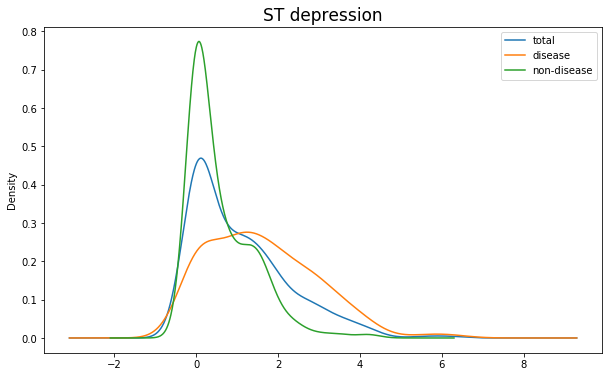

oldpeak difference disease vs non disease: 0.000


In [108]:
# oldpeak = ST depression induced by exercise relative to rest
plt.figure(figsize = F)
data.oldpeak.plot(kind = 'kde')
data[data["target"]==1].oldpeak.plot(kind ='kde')
data[data["target"]==0].oldpeak.plot(kind ='kde')
plt.legend(['total','disease','non-disease'])
plt.title('ST depression', fontsize = Fsize)
plt.show()
a = stats.ttest_ind(data[data['target']==0].oldpeak,data[data['target']==1].oldpeak)
print('oldpeak difference disease vs non disease: {:.3f}'.format(a.pvalue))

### oldpeak significant

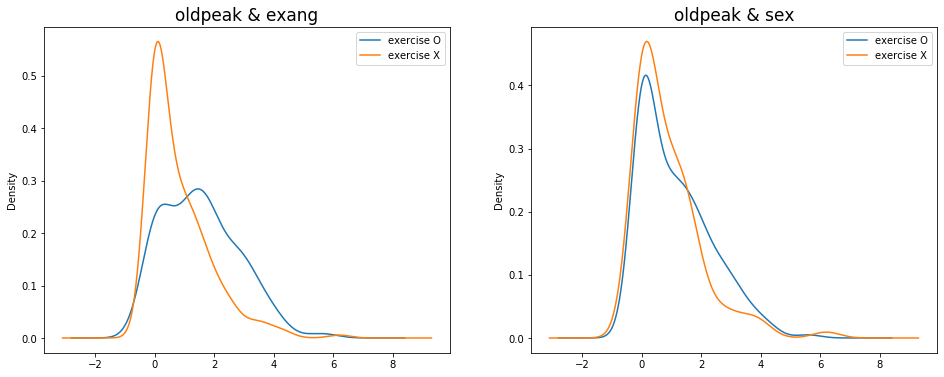

maximum heart rate difference exercise vs non exercise: 0.000
oldpeak difference exercise vs non exercise: 0.078


In [109]:
f, ax = plt.subplots(1,2, figsize = subF)
data[data["exang"]==1].oldpeak.plot(kind ='kde', ax = ax[0])
data[data["exang"]==0].oldpeak.plot(kind ='kde', ax = ax[0])
ax[0].legend(['exercise O','exercise X'])
ax[0].set_title('oldpeak & exang', fontsize = Fsize)
data[data["sex"]==1].oldpeak.plot(kind ='kde', ax = ax[1])
data[data["sex"]==0].oldpeak.plot(kind ='kde', ax = ax[1])
ax[1].legend(['exercise O','exercise X'])
ax[1].set_title('oldpeak & sex', fontsize = Fsize)
plt.show()
a = stats.ttest_ind(data[data['exang']==0].oldpeak,data[data['exang']==1].oldpeak)
b = stats.ttest_ind(data[data['sex']==0].oldpeak,data[data['sex']==1].oldpeak)
print('maximum heart rate difference exercise vs non exercise: {:.3f}'.format(a.pvalue))
print('oldpeak difference exercise vs non exercise: {:.3f}'.format(b.pvalue))

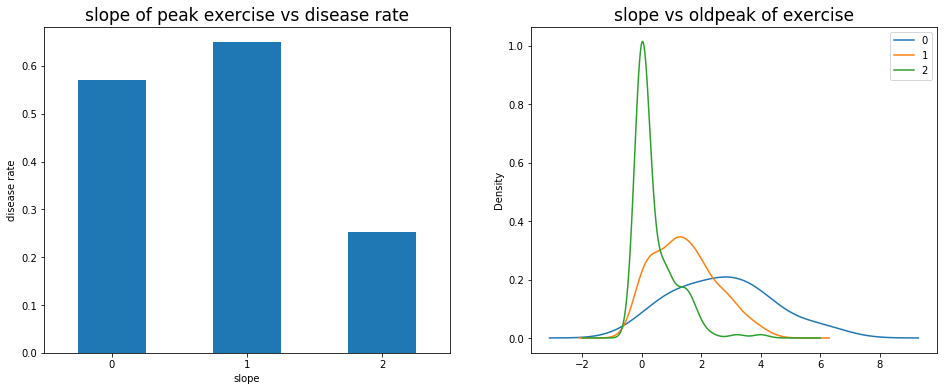

오른쪽이 뭔가, 기준? 같은거같은데? slope 이 oldpeak discrete labeling 해 놓은거 같음


In [110]:
# the slope of the peak exercise ST segment
f, ax = plt.subplots(1,2, figsize = subF)
data.target.groupby(data.slope).mean().plot.bar(rot = 0, ax = ax[0])
ax[0].set_title('slope of peak exercise vs disease rate', fontsize = Fsize)
ax[0].set_ylabel('disease rate')

data[data.slope == 0].oldpeak.plot(kind = 'kde',ax = ax[1])
data[data.slope == 1].oldpeak.plot(kind = 'kde',ax = ax[1])
data[data.slope == 2].oldpeak.plot(kind = 'kde',ax = ax[1])
ax[1].legend(['0','1','2'])
ax[1].set_title('slope vs oldpeak of exercise',fontsize = Fsize)
plt.show()

print('오른쪽이 뭔가, 기준? 같은거같은데? slope 이 oldpeak discrete labeling 해 놓은거 같음')

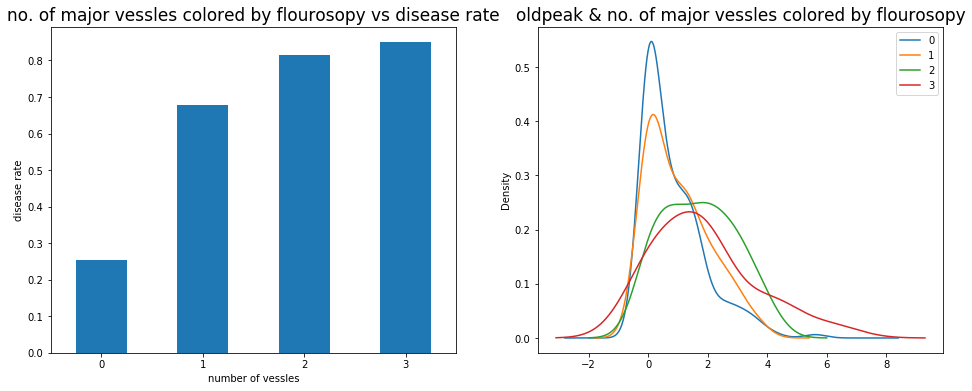

In [146]:
#number of major vessels (0-3) colored by flourosopy
f, ax = plt.subplots(1,2, figsize = subF)
data.target.groupby(data.ca).mean().plot.bar(rot = 0, ax = ax[0])
ax[0].set_title('no. of major vessles colored by flourosopy vs disease rate', fontsize = Fsize)
ax[0].set_ylabel('disease rate')
ax[0].set_xlabel('number of vessles')

data.oldpeak.groupby(data.ca).plot(kind= 'kde', ax = ax[1])
ax[1].legend(['0','1','2','3','4'])
ax[1].set_title('oldpeak & no. of major vessles colored by flourosopy', fontsize = Fsize)
plt.show()

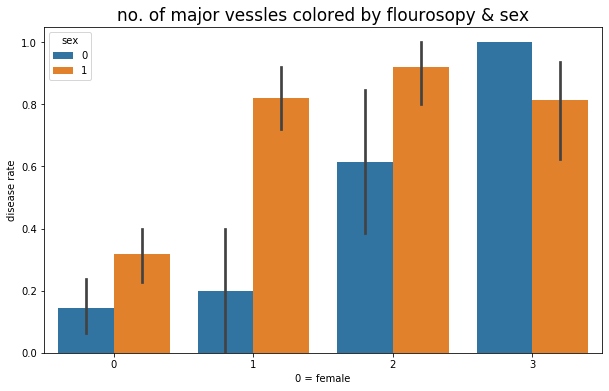

4 개 다 flourosopy 인게 약간 예외적으로 병걸리는 거같은데? 뭐지?


In [145]:
plt.figure(figsize = F)
sns.barplot(data = data, x = 'ca', y = 'target', hue = 'sex')
plt.title('no. of major vessles colored by flourosopy & sex', fontsize = Fsize)
plt.ylabel('disease rate')
plt.xlabel('0 = female')
plt.show()

print('4 개 다 flourosopy 인게 약간 예외적으로 병걸리는 거같은데? 뭐지?')

### thal : Thallium test 결과
As for the meaning of "fixed defect" and "reversible defect" I'm not completely sure but I think that by "fixed defect" it means that they didn't see blood flowing in some part of the body at all. And by "reversible defect" I think that they mean that they didn't see blood flowing in some part of the body during exercise but they did during rest.

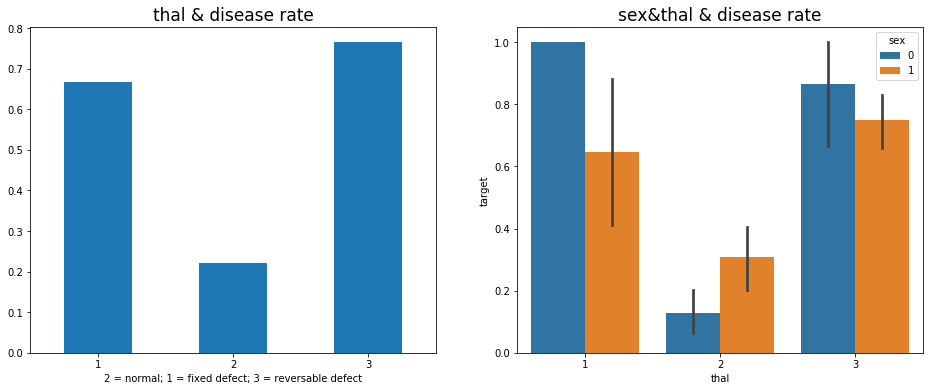

In [150]:
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
f, ax = plt.subplots(1,2, figsize = subF)
data.target.groupby(data.thal).mean().plot.bar(rot = 0,ax = ax[0])
ax[0].set_title('thal & disease rate',fontsize = Fsize)
ax[0].set_xlabel('2 = normal; 1 = fixed defect; 3 = reversable defect')
sns.barplot(data = data, x = 'thal', y = 'target', hue = 'sex', ax = ax[1])
ax[1].set_title('sex&thal & disease rate',fontsize = Fsize)
plt.show()



In [153]:
cate = ['restecg','thal']
num = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'target']
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

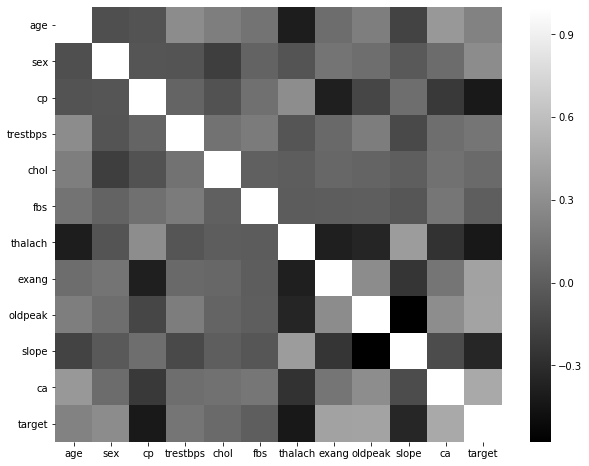

In [166]:
a = data[num].corr()
plt.figure(figsize = (10,8))
heat = sns.heatmap(a,cmap = "gist_gray")
buttom, top = heat.get_ylim()
heat.set_ylim(buttom +0.5,top - 0.5)
plt.show()